Connected to env (Python 3.12.3)

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "http://books.toscrape.com/catalogue/category/books/history_32/index.html"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')

books = []
for book in soup.select('.product_pod'):
    title = book.h3.a['title']
    price = book.select_one('.price_color').text.strip()
    books.append({'Judul': title, 'Harga': price})

df = pd.DataFrame(books)
df.to_csv('books_history.csv', index=False)

# Re-load CSV
df = pd.read_csv('books_history.csv')

# Bersihin kolom harga (hapus simbol £ dan convert ke float)
df['Harga'] = df['Harga'].str.replace('£', '').astype(float)

# Cek null dan duplikat
print("\n🧼 Cek data kosong:")
print(df.isnull().sum())

print("\n🧼 Duplikat:")
print(df.duplicated().sum())

# Top 5 buku termahal
top5 = df.sort_values(by='Harga', ascending=False).head()

print("\n🔥 5 Buku Termahal:")
print(top5[['Judul', 'Harga']].to_string(index=False))


🧼 Cek data kosong:
Judul    0
Harga    0
dtype: int64

🧼 Duplikat:
0

🔥 5 Buku Termahal:
                                                                                    Judul  Harga
Thomas Jefferson and the Tripoli Pirates: The Forgotten War That Changed American History  59.64
                                                 Catherine the Great: Portrait of a Woman  58.55
                                                                         The Hiding Place  55.91
                                                    Sapiens: A Brief History of Humankind  54.23
                                                     A Short History of Nearly Everything  52.40


In [2]:
# %%
# Tambah kolom kategori & keyword analysis ===

# Tambah kolom kategori
df['Kategori'] = 'History'

# Deteksi keyword di judul buku
df['Keyword_War'] = df['Judul'].str.contains('(?i)war')
df['Keyword_History'] = df['Judul'].str.contains('(?i)history')
df['Keyword_America'] = df['Judul'].str.contains('(?i)america')

# Simpan hasil enrich ke file baru
df.to_csv('books_history_enriched.csv', index=False)

# Quick preview
df[['Judul', 'Harga', 'Kategori', 'Keyword_War', 'Keyword_History', 'Keyword_America']].head()


,Judul,Harga,Kategori,Keyword_War,Keyword_History,Keyword_America
0,Sapiens: A Brief History of Humankind,54.23,History,False,True,False
1,"Unbound: How Eight Technologies Made Us Human,...",25.52,History,False,False,False
2,The Age of Genius: The Seventeenth Century and...,19.73,History,False,False,False
3,"Political Suicide: Missteps, Peccadilloes, Bad...",36.28,History,False,False,True
4,Thomas Jefferson and the Tripoli Pirates: The ...,59.64,History,True,True,True


In [3]:
# %%
# Statistik dasar harga buku
print("📊 Statistik Harga Buku History:")
print(df['Harga'].describe())

📊 Statistik Harga Buku History:
count    18.000000
mean     37.295000
std      16.600735
min      11.450000
25%      22.525000
50%      41.290000
75%      52.105000
max      59.640000
Name: Harga, dtype: float64


In [4]:
# %%
print("🔍 Jumlah buku bertema WAR:", df['Keyword_War'].sum())
print("🔍 Jumlah buku bertema HISTORY:", df['Keyword_History'].sum())
print("🔍 Jumlah buku bertema AMERICA:", df['Keyword_America'].sum())

🔍 Jumlah buku bertema WAR: 3
🔍 Jumlah buku bertema HISTORY: 6
🔍 Jumlah buku bertema AMERICA: 5


In [5]:
# %%
# === STEP 1: Scrape buku kategori Fantasy ===
import pandas as pd
import requests
from bs4 import BeautifulSoup

base_url = "http://books.toscrape.com/catalogue/category/books/fantasy_19/"
urls = [f"{base_url}index.html"]

# Tambah halaman berikutnya (Fantasy punya 3 halaman)
for i in range(2, 4):
    urls.append(f"{base_url}page-{i}.html")

books = []

for url in urls:
    print(f"📄 Scraping {url}")
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')

    for book in soup.select('.product_pod'):
        title = book.h3.a['title']
        price = book.select_one('.price_color').text.strip()
        books.append({'Judul': title, 'Harga': price})

df_fantasy = pd.DataFrame(books)
df_fantasy.to_csv('books_fantasy.csv', index=False)
print("✅ Done! Data disimpan ke books_fantasy.csv")



📄 Scraping http://books.toscrape.com/catalogue/category/books/fantasy_19/index.html
📄 Scraping http://books.toscrape.com/catalogue/category/books/fantasy_19/page-2.html
📄 Scraping http://books.toscrape.com/catalogue/category/books/fantasy_19/page-3.html
✅ Done! Data disimpan ke books_fantasy.csv


In [6]:
# %%
# === STEP 2: Bersihin kolom harga jadi float ===

df_fantasy = pd.read_csv('books_fantasy.csv')
df_fantasy['Harga'] = df_fantasy['Harga'].str.replace('£', '').astype(float)
df_fantasy.head()

,Judul,Harga
0,Unicorn Tracks,18.78
1,"Saga, Volume 6 (Saga (Collected Editions) #6)",25.02
2,Princess Between Worlds (Wide-Awake Princess #5),13.34
3,Masks and Shadows,56.40
4,Crown of Midnight (Throne of Glass #2),43.29


In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "http://books.toscrape.com/catalogue/category/books/fantasy_19/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')

books = []
for book in soup.select('.product_pod'):
    title = book.h3.a['title']
    price = book.select_one('.price_color').text.strip()
    books.append({'Judul': title, 'Harga': price})

df = pd.DataFrame(books)
df.to_csv('books_fantasy.csv', index=False)

# Re-load CSV
df = pd.read_csv('books_fantasy.csv')

# Bersihin kolom harga (hapus simbol £ dan convert ke float)
df['Harga'] = df['Harga'].str.replace('£', '').astype(float)

# Cek null dan duplikat
print("\n🧼 Cek data kosong:")
print(df.isnull().sum())

print("\n🧼 Duplikat:")
print(df.duplicated().sum())

# Top 5 buku termahal
top5 = df.sort_values(by='Harga', ascending=False).head()

print("\n🔥 5 Buku Termahal:")
print(top5[['Judul', 'Harga']].to_string(index=False))


🧼 Cek data kosong:
Judul    0
Harga    0
dtype: int64

🧼 Duplikat:
0

🔥 5 Buku Termahal:
                                                       Judul  Harga
                 A Shard of Ice (The Black Symphony Saga #1)  56.63
                                           Masks and Shadows  56.40
                   City of Glass (The Mortal Instruments #3)  56.02
A Court of Thorns and Roses (A Court of Thorns and Roses #1)  52.37
                 The Hidden Oracle (The Trials of Apollo #1)  52.26


In [8]:
# %%
# === STEP A: Enrich Data Fantasy Books ===

# 1. Tambahkan kategori tetap
df['Kategori'] = 'Fantasy'

# 2. Tambahkan keyword flag (case-insensitive)
df['Keyword_Magic'] = df['Judul'].str.contains('(?i)magic')
df['Keyword_King'] = df['Judul'].str.contains('(?i)king')
df['Keyword_Dragon'] = df['Judul'].str.contains('(?i)dragon')
df['Keyword_Sword'] = df['Judul'].str.contains('(?i)sword')

# 3. Simpan enriched version
df.to_csv('books_fantasy_enriched.csv', index=False)

# 4. Quick check output
print("\n✅ Enrichment done. Sample data:")
print(df[['Judul', 'Harga', 'Kategori', 'Keyword_Magic', 'Keyword_King', 'Keyword_Dragon', 'Keyword_Sword']].head())

print("\n🔍 Keyword Stats:")
print("Magic:", df['Keyword_Magic'].sum())
print("King:", df['Keyword_King'].sum())
print("Dragon:", df['Keyword_Dragon'].sum())
print("Sword:", df['Keyword_Sword'].sum())



✅ Enrichment done. Sample data:
                                              Judul  Harga Kategori  \
0                                    Unicorn Tracks  18.78  Fantasy   
1     Saga, Volume 6 (Saga (Collected Editions) #6)  25.02  Fantasy   
2  Princess Between Worlds (Wide-Awake Princess #5)  13.34  Fantasy   
3                                 Masks and Shadows  56.40  Fantasy   
4            Crown of Midnight (Throne of Glass #2)  43.29  Fantasy   

   Keyword_Magic  Keyword_King  Keyword_Dragon  Keyword_Sword  
0          False         False           False          False  
1          False         False           False          False  
2          False         False           False          False  
3          False         False           False          False  
4          False         False           False          False  

🔍 Keyword Stats:
Magic: 1
King: 1
Dragon: 1
Sword: 0


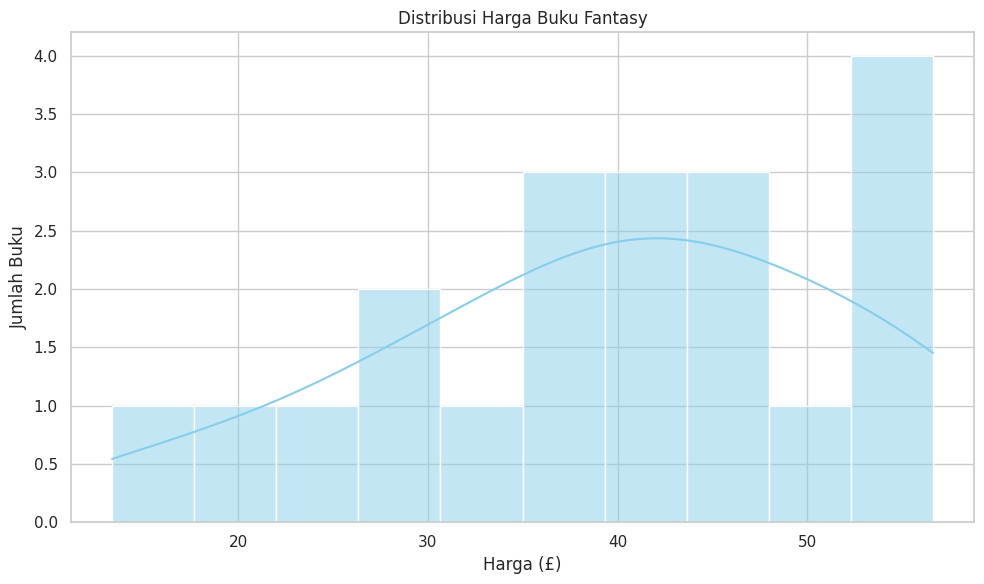

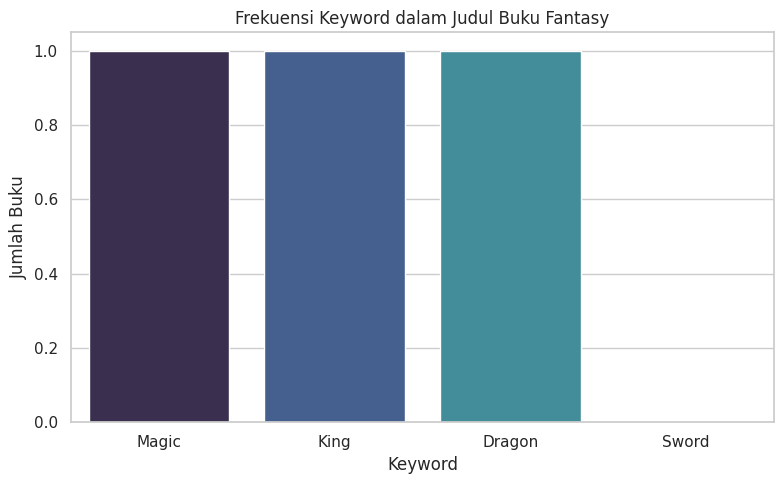

In [9]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns

# clean looks
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Harga'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Harga Buku Fantasy')
plt.xlabel('Harga (£)')
plt.ylabel('Jumlah Buku')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
keyword_counts = df[['Keyword_Magic', 'Keyword_King', 'Keyword_Dragon', 'Keyword_Sword']].sum()
sns.barplot(
    x=keyword_counts.index.str.replace("Keyword_", ""), 
    y=keyword_counts.values, 
    hue=keyword_counts.index.str.replace("Keyword_", ""),  # Assign ke hue
    palette='mako', 
    legend=False  # Supaya hue nggak munculin legenda dobel
)
plt.title('Frekuensi Keyword dalam Judul Buku Fantasy')
plt.ylabel('Jumlah Buku')
plt.xlabel('Keyword')
plt.tight_layout()
plt.show()

In [10]:
# %% [markdown]
# ### 🔧 Feature Engineering: Ekstraksi Fitur dari Judul

# %% 
df['Judul_Length'] = df['Judul'].apply(len)
df['Jumlah_Kata_Judul'] = df['Judul'].apply(lambda x: len(x.split()))
df['Is_Series'] = df['Judul'].str.contains(r'#\d+', regex=True)
df['Contains_Colon'] = df['Judul'].str.contains(":")

# 🔍 Cek sample
print("✅ Feature Engineering selesai. Contoh data:")
print(df[['Judul', 'Judul_Length', 'Jumlah_Kata_Judul', 'Is_Series', 'Contains_Colon']].head(5))

✅ Feature Engineering selesai. Contoh data:
                                              Judul  Judul_Length  \
0                                    Unicorn Tracks            14   
1     Saga, Volume 6 (Saga (Collected Editions) #6)            45   
2  Princess Between Worlds (Wide-Awake Princess #5)            48   
3                                 Masks and Shadows            17   
4            Crown of Midnight (Throne of Glass #2)            38   

   Jumlah_Kata_Judul  Is_Series  Contains_Colon  
0                  2      False           False  
1                  7       True           False  
2                  6       True           False  
3                  3      False           False  
4                  7       True           False  


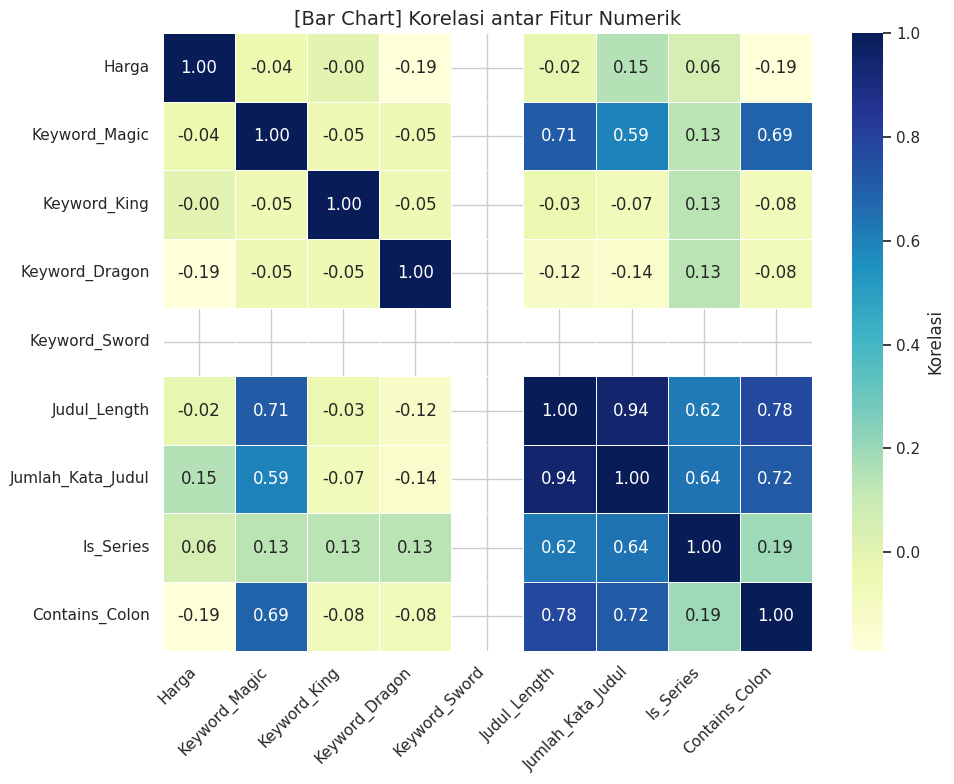

In [11]:
# %% [markdown]
# ### 📈 Korelasi Antar Fitur Numerik

# %%
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap='YlGnBu', 
            fmt=".2f", 
            linewidths=0.5,
            cbar_kws={'label': 'Korelasi'})

plt.title(u"[Bar Chart] Korelasi antar Fitur Numerik", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

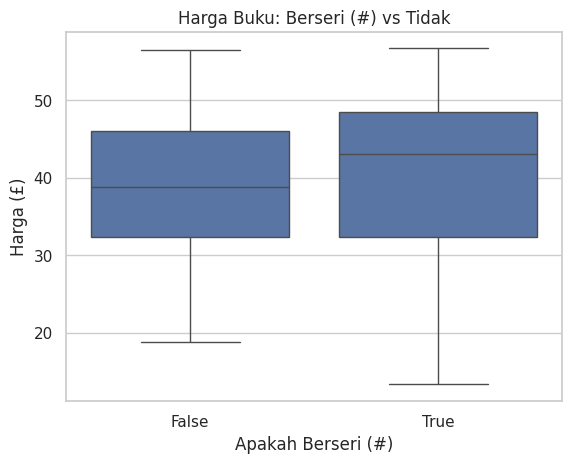

In [12]:
# %% [markdown]
# ### Analisis Harga Buku Berseri vs Tidak

# %%
sns.boxplot(x='Is_Series', y='Harga', data=df)
plt.title("Harga Buku: Berseri (#) vs Tidak")
plt.xlabel("Apakah Berseri (#)")
plt.ylabel("Harga (£)")
plt.show()

In [13]:
# %% [markdown]
# ## 🚀 Scrape Buku: Science Fiction

# %%
import pandas as pd
import requests
from bs4 import BeautifulSoup

base_url = "http://books.toscrape.com/catalogue/category/books/science-fiction_16/"
page_url = "index.html"
books = []

while True:
    print(f"🔍 Scraping: {page_url}")
    res = requests.get(base_url + page_url)
    soup = BeautifulSoup(res.content, 'lxml')

    for book in soup.select('.product_pod'):
        title = book.h3.a['title']
        price = book.select_one('.price_color').text.strip()
        books.append({'Judul': title, 'Harga': price, 'Kategori': 'Science Fiction'})

    next_btn = soup.select_one('.next > a')
    if next_btn:
        page_url = next_btn['href']
    else:
        break

df = pd.DataFrame(books)
df.to_csv("books_scifi.csv", index=False)
print("✅ Beres. Disimpan ke books_scifi.csv")

# %% [markdown]
# ## ✨ Cleaning & Enrichment

# %%
# Re-load biar clean
df = pd.read_csv("books_scifi.csv")
df['Harga'] = df['Harga'].str.replace('£', '').astype(float)

# Keyword enrichment
keywords = {
    'Keyword_Space': 'space',
    'Keyword_Alien': 'alien',
    'Keyword_Time': 'time',
    'Keyword_Future': 'future',
}

for col, kw in keywords.items():
    df[col] = df['Judul'].str.lower().str.contains(kw)

# Feature engineering dari judul
df['Judul_Length'] = df['Judul'].apply(len)
df['Jumlah_Kata_Judul'] = df['Judul'].apply(lambda x: len(x.split()))
df['Is_Series'] = df['Judul'].str.contains(r'#\d+', regex=True)
df['Contains_Colon'] = df['Judul'].str.contains(":")

print("✅ Enrichment done. Contoh:")
print(df.head(3))


🔍 Scraping: index.html
✅ Beres. Disimpan ke books_scifi.csv
✅ Enrichment done. Contoh:
                                               Judul  Harga         Kategori  \
0  Mesaerion: The Best Science Fiction Stories 18...  37.59  Science Fiction   
1                                               Join  35.67  Science Fiction   
2  William Shakespeare's Star Wars: Verily, A New...  43.30  Science Fiction   

   Keyword_Space  Keyword_Alien  Keyword_Time  Keyword_Future  Judul_Length  \
0          False          False         False           False            53   
1          False          False         False           False             4   
2          False          False         False           False            88   

   Jumlah_Kata_Judul  Is_Series  Contains_Colon  
0                  7      False            True  
1                  1      False           False  
2                 13       True            True  


In [20]:
# %% [markdown]
# ## 🚀 Scrape Buku: Romance

# %%
import pandas as pd
import requests
from bs4 import BeautifulSoup

base_url = "http://books.toscrape.com/catalogue/category/books/romance_8/"
page_url = "index.html"
books = []

while True:
    print(f"🔍 Scraping: {page_url}")
    res = requests.get(base_url + page_url)
    soup = BeautifulSoup(res.content, 'lxml')

    for book in soup.select('.product_pod'):
        title = book.h3.a['title']
        price = book.select_one('.price_color').text.strip()
        books.append({'Judul': title, 'Harga': price, 'Kategori': 'Romance'})

    next_btn = soup.select_one('.next > a')
    if next_btn:
        page_url = next_btn['href']
    else:
        break

df = pd.DataFrame(books)
df.to_csv("books_romance.csv", index=False)
print("✅ Beres. Disimpan ke books_romance.csv")

# %% [markdown]
# ## ✨ Cleaning & Enrichment

# %%
# Re-load biar clean
df = pd.read_csv("books_romance.csv")
df['Harga'] = df['Harga'].str.replace('£', '').astype(float)

# Keyword enrichment
keywords = {
    'Keyword_Love': 'love',
    'Keyword_Cheating': 'cheating',
    'Keyword_Forever': 'forever',
    'Keyword_Wedding': 'wedding',
}

for col, kw in keywords.items():
    df[col] = df['Judul'].str.lower().str.contains(kw)

# Feature engineering dari judul
df['Judul_Length'] = df['Judul'].apply(len)
df['Jumlah_Kata_Judul'] = df['Judul'].apply(lambda x: len(x.split()))
df['Is_Series'] = df['Judul'].str.contains(r'#\d+', regex=True)
df['Contains_Colon'] = df['Judul'].str.contains(":")

print("✅ Enrichment done. Contoh:")
print(df.head(3))


🔍 Scraping: index.html
🔍 Scraping: page-2.html
✅ Beres. Disimpan ke books_romance.csv
✅ Enrichment done. Contoh:
                                           Judul  Harga Kategori  \
0                     Chase Me (Paris Nights #2)  25.27  Romance   
1                                     Black Dust  34.53  Romance   
2  Her Backup Boyfriend (The Sorensen Family #1)  33.97  Romance   

   Keyword_Love  Keyword_Cheating  Keyword_Forever  Keyword_Wedding  \
0         False             False            False            False   
1         False             False            False            False   
2         False             False            False            False   

   Judul_Length  Jumlah_Kata_Judul  Is_Series  Contains_Colon  
0            26                  5       True           False  
1            10                  2      False           False  
2            45                  7       True           False  
